# Visualización de datos

Semana Tec

Profesores: Luz Eunice Angeles /José Ignacio Treviño

## Librerías de visualización de datos

Pandas tiene funciones integradas para crear visualizaciones de manera rápida. Sin embargo, si queremos agregar más detalles o elementos a los gráficos, requerimos utilizar directamente Matplotlib u otra librería especializada en visualización.

* **Matplotlib** es la librería más utilizada para crear gráficos en Python. Está basada en la graficación de Matlab. Permite agregar elementos sobre el gráfico, modificar títulos y leyendas, cambiar colores, entre muchas otras funciones.

* Como desventaja, para cada detalle que queramos agregar es probable que requiramos agregar una línea de código. 

* **Seaborn** es una librería que está basada en Matplotlib, con la ventaja de que los gráficos que genera son más bonitos por defecto y que utiliza menos líneas de código. Como desventaja, para detalles muy específicos requiere que agreguemos código de matplotlib.

* **Plotly** es una librería para crear gráficos tipo dashboard. Esto quiere decir que las visualizaciones creadas con esta librería son interactivas: al pasar el cursos por encima podemos ver capturas con el detalle de los datos. Como principal desventaja, el código para generar este tipo de gráficos es más complejo que los casos anteriores. 

In [1]:
# Si trabajamos en Google Colaboratory corremos las siguientes lineas de código
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Nos cambiamos a la carpeta donde tengamos el repositorio
%cd 'drive/MyDrive/SemanaTec/Repos/arte-analitica'

/content/drive/MyDrive/SemanaTec/Repos/arte-analitica


## Ejemplo: Datos demográficos de países

In [3]:
# Importar lass librerías de visualización y manejo de datos

import numpy as np
import pandas as pd
# Matplotlib lo utilizamos con el acrónimo plt
import matplotlib.pyplot as plt
# Seaborn lo utilizamos con el acrónimo sns
import seaborn as sns

# Para hacer las gráficas más bonitas cambiamos el estilo a Seaborn
sns.set()

In [4]:
# Primero vamos a cargar el dataset con el que vamos a trabajar.
nations_df = pd.read_csv('data/nations.csv')

In [5]:
# Vamos a ver el inicio de la tabla
nations_df.head()

,name,region,year,income,population,lifeExpectancy
0,Angola,Sub-Saharan Africa,1990,2777.42,8290856.0,41.99
1,Angola,Sub-Saharan Africa,1991,2730.85,8490763.0,42.16
2,Angola,Sub-Saharan Africa,1992,2627.85,8735988.0,42.32
3,Angola,Sub-Saharan Africa,1993,1869.92,8961438.0,42.46
4,Angola,Sub-Saharan Africa,1994,1851.45,9170032.0,42.59


La tabla contiene las siguientes columnas:
* Nombre del país.
* Región a la que pertenece
* Año
* Ingreso per cápita
* Población
* Esperanza de vida en años

In [6]:
# Vamos a ver el tipo de cada columna
nations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            3339 non-null   object 
 1   region          3339 non-null   object 
 2   year            3339 non-null   int64  
 3   income          3339 non-null   float64
 4   population      3339 non-null   float64
 5   lifeExpectancy  3339 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 156.6+ KB


# Tipos de gráficos

## Gráfico de líneas (Line Chart o Line Plot)

Cuando queremos mostrar **tendencias** o **cambios en el tiempo**, el gráfico que mejor describe estas caractrísticas es el de **líneas**. Este gráfico muestra una o más variables *numéricas* en el eje $y$; en el eje $x$ colocamos una variable de tipo *fecha* o *tiempo*.

In [7]:
# Graficar la evolución expectativa de vida para México

#Primero hay que consultar (filtrar) la información de México
datos = nations_df.query('name == "Mexico"')

# En el eje X vamos a popner los años y en el eje y el valor de la expectativa de vida.
x = datos['year']
y = datos['lifeExpectancy']

Text(0, 0.5, 'Esperanza de vida')

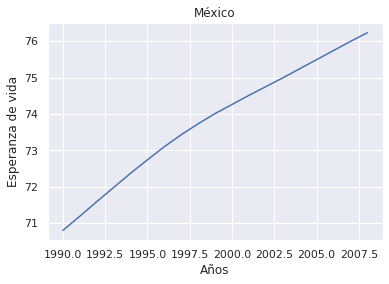

In [8]:
# Vamos a crear una figura.
# Con figure podemos definir el tamaño de la imagen,
fig = plt.figure(figsize=(6,4))

# Graficamos con plot
plt.plot(x, y)

# Para agregar título, usamos plt.title
plt.title('México')
# Nombre para el eje X
plt.xlabel('Años')
# Nombre para el eje Y
plt.ylabel('Esperanza de vida')

Podemos agregar más de un país a la gráfica.

Text(0, 0.5, 'Número de inmigrantes')

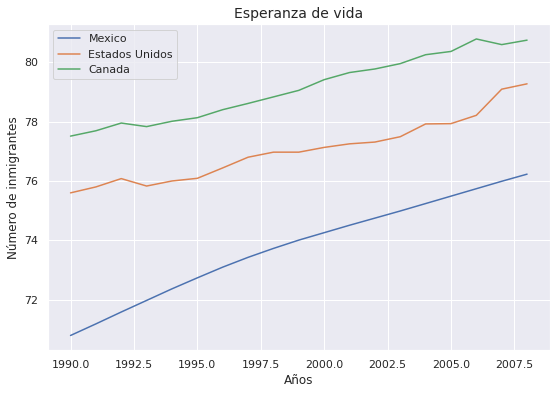

In [9]:
# Graficar la historia de los migrantes a Canada desde España, Alemania, Francia y Greia
# En el eje X colocamos los años
x = np.arange(1980, 2014)

# México
x1  = nations_df.query('name=="Mexico"')['year']
y1 = nations_df.query('name=="Mexico"')['lifeExpectancy']
# Estados Unidos
x2 = nations_df.query('name=="United States"')['year']
y2 = nations_df.query('name=="United States"')['lifeExpectancy']
# Canadá
x3 = nations_df.query('name == "Canada"')['year']
y3 = nations_df.query('name=="Canada"')['lifeExpectancy']

# Con figure podemos definir el tamaño de la imagen,
fig = plt.figure(figsize=(9,6))

# Graficamos cada país
# Con label podemos identificar el país
plt.plot(x1, y1, label='Mexico')
plt.plot(x2, y2, label='Estados Unidos')
plt.plot(x3, y3, label='Canada')

# Con el parámetro fontsize, podemos cambiar el tamaño de texto
plt.title('Esperanza de vida', fontsize=14)
# Agregamos la LEYENDA para identificar a cada país
# Loc best seleccina el mejor lugar disponible en la gráfica
plt.legend(loc='best')

# Nombre para el eje X
plt.xlabel('Años', fontsize=12)
# Nombre para el eje Y
plt.ylabel('Número de inmigrantes', fontsize=12)

Con **Seaborn**, podemos hacer este mismo gráfico de una manera más rápida. Seaborn requiere que los datos estén en **formato largo**. Esto quiere decir que cada columna representa una variable. La tabla de datos con la que estamos trabajando está en formato largo.

In [10]:
# Vamos a seleccionar los tres paises
noa = ['Mexico','United States','Canada'] 
datos = nations_df.query('name in @noa')

# Ver una muestra de la tabla
datos.sample(n=5)

,name,region,year,income,population,lifeExpectancy
1454,Canada,America,2004,34346.97,32507874.0,80.25
1707,Mexico,America,1992,9472.38,88111030.0,71.59
1883,United States,America,1997,36847.81,272911760.0,76.80
1879,United States,America,1993,33914.89,260255352.0,75.83
1442,Canada,America,1992,26342.88,28523502.0,77.95


Text(0.5, 1.0, 'Esperanza de vida')

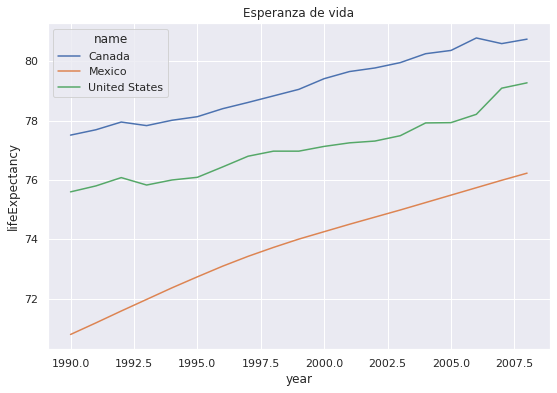

In [11]:
# Con figure podemos definir el tamaño de la imagen,
fig = plt.figure(figsize=(9,6))

# Con el parámetro hue, controlamos el color de la línea. 
sns.lineplot(data=datos, x='year', y='lifeExpectancy', hue='name')
# Agregamos el título con plt
plt.title('Esperanza de vida')

## Histogramas.

Los histogramas nos ayudan a visualizar la **distribución** de una variable numérica. Seaborn también tiene una función para crear histogramas de manera sencilla.

En el histograma podemos seleccionar el número de cajas con el parámetro `bins`.

In [2]:
# Vamos a ver cómo varía la población de los países americanos en el año 2008
# Seleccionamos las condiciones con un AND porque se tienen que cumplir simultáneamente
datos = nations_df.query('region=="America" & year==2008')
datos.sample(n=10)

NameError: ignored

In [ ]:
# Con figure podemos definir el tamaño de la imagen,
fig = plt.figure(figsize=(9,6))

# Crear el histograma del ingreso per cápita-
sns.histplot(data=datos, x='income', bins=18)
plt.title('Distribución del ingreso per cápita')

In [ ]:
# Incluso podemos agregar una estimación de cómo se vería una distribución de probabilidad
# Con figure podemos definir el tamaño de la imagen,
fig = plt.figure(figsize=(9,6))

# Crear el histograma del ingreso per cápita-

sns.histplot(data=datos, x='income', bins=18, kde=True)
plt.title('Distribución del ingreso per cápita')

In [ ]:
# Vamos a ver qué otras regiones hay en la tabla
print(nations_df['region'].unique())

In [ ]:
# Vamos ahora a comparar el ingreso per capita de America y Europa para el último año disponible (2008)
# La selección de las regiones es un OR porque puede ser una o la otra
datos = nations_df.query('(region=="America" | region=="Europe & Central Asia") & year==2008')
datos.sample(n=10)

In [ ]:
# Con figure podemos definir el tamaño de la imagen,
fig = plt.figure(figsize=(9,6))

# Crear el histograma del ingreso per cápita por region
sns.histplot(data=datos, x='income', hue = 'region', kde=True)
plt.title('Distribución del ingreso per cápita')

## Gráficos de caja (Boxplot)
Un diagrama de caja (y bigotes) es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. 

Este gráfico es muy útil porque nos permite visualizar de manera rápida estos estadísticos:
* 1er cuartil
* 3er cuartil
* Mediana
* Máximo y mínimo
* Valores atípicos.

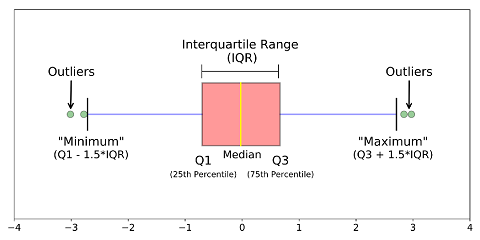

La usamos cuando queremos comparar **una variable numérica** que podemos separar en varios grupos o **categorías**, similar al último histograma que realizamos. La ventaja es que podemos agregar más de dos categorías sin perder visibilidad de los datos.

In [ ]:
# Diagrama de caja del ingreso per cápita de los países americanos en 2007. Vamos a compararlo con el histograma.
datos = nations_df.query('region=="America" & year==2007')

# Con el siguiente comando creamos un "lienzo" para agregar dos gráficos en la misma imagen
# El primer parámetro se refiere al número de filas
# El segundo parámetro se refiere al número de renglones
fig, axs = plt.subplots(1,2, figsize=(12, 5))

# Primero grafiquemos el histograma, para decirle en donde graficarla agregamos el parametro AX
sns.histplot(data = datos, x='income', ax=axs[0])
# Para agregar un título cambiamos ligeramente la sintaxis
axs[0].set_title('Histograma del ingreso per cápita en países americanos 2007')

# Después grafiquemos el boxplot, para decirle en donde graficarla agregamos el parametro AX
sns.boxplot(data = datos, x='income', ax=axs[1])
axs[1].set_title('Diagrama de caja del ingreso per cápita en países americanos 2007')


Los puntos en el histograma representan **datos atípicos** (outliers). Estos datos presentan valores extremos, es decir, que están muy por encima comparados con el resto de las observaciones.

Ahora, veamos cómo se distribuye el ingreso por región:

In [ ]:
fig = plt.figure(figsize=(10, 6))

# Seleccionamos los datos de 2007
# Boxplots del ingreso per capita por region
sns.boxplot(data = nations_df.query('year==2007'), x='income', y='region')
plt.title('Comparación del ingreso per cápita por región')

In [ ]:
fig = plt.figure(figsize=(15, 8))

# Mismo gráfico pero cambiamos los ejes. ¿Cuál se ve mejor?
sns.boxplot(data = nations_df.query('year==2007'), y='income', x='region')
axs[1].set_title('Comparación del ingreso per cápita por región')


## Mapa de calor (Heat map)

Esta técnica de visualización de datos nos muestra la magnitud de una variable que se distribuye en dos dimensiones. En esencia, es colorear una **tabla** donde la intensidad del color corresponde al valor de cada celda. Es muy útil cuando tenemos tablas en formato ancho, donde tenemos valores de variables en las columnas y en las filas. 

Normalmente, lo utilizamos en dos ocaciones:
* Para visualizar una **matriz de correlación**.
* Para visualizar una tabla donde tanto las filas y las columnas correspondan a los **niveles** de dos variables categóricas.

In [1]:
# Vamos a obtener la matriz de correlación de las tres variables (ingreso, población y esperanza de vida)
corr_matrix = nations_df.loc[:, ['income','population','lifeExpectancy']].corr()

# El resultado siempre es una matriz cuadrada con el número de columnas igual al número de variables.
corr_matrix

NameError: ignored

In [ ]:
# Vamos a graficar la matriz con un mapa de calor
sns.heatmap(data=corr_matrix)

La barra lateral es el **mapa de color**, que nos muestra la correspondencia del valor de la tabla a un color en específico. Existen diferentes mapas de colores que podemos utilizar, la lista está en la siguiente liga:

[Mapas de Color. Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [ ]:
# Con el parámetro cmap podemos cambiar el mapa de colores.
sns.heatmap(data=corr_matrix, cmap='Blues')

### Extra: mapa de calor con tabla resumen

In [ ]:
# Lo siguiente es EXTRA.
# Vamos a crear una tabla donde en las columnas y en las filas tengamos categorías. 
# Vamos a calcular el ingreso promedio por región y por año
datos = nations_df.groupby(['region', 'year'])['income'].mean()
datos.head()

In [ ]:
# Lo anterior nos dio como resultado una Serie de Pandas. Para convertirlo a DataFrame usamos el método to_frame
datos = datos.to_frame('mean income')
datos.head()

In [ ]:
# Lo que está en negritas es el índice. Para convertirlo en columnas usamos reset_index
datos = datos.reset_index()
datos.head()

In [ ]:
# Vamos ahora a mover la variable region a columnas con pivot_table
# index son las variables que queremos que se queden en los renglones
# columns son las variables que queremos mover a las columnas
# values son las variables que representan la información principal de la tabla
# aggfunc es cómo queremos agrupar las variables en values
datos_pivote = pd.pivot_table(data=datos, index='year', columns='region', 
                              values='mean income', aggfunc=np.mean)
datos_pivote

In [ ]:
# La última fila no tiene datos completos. La eliminamos para no generar ruido.
datos_pivote = datos_pivote.drop(2009, axis=0)

In [ ]:
# Ya que la tabla tiene categorías tanto en los renglones como en las columnas, usamos el mapa de calor
sns.heatmap(data=datos_pivote, cmap='viridis')

## Gráficos de barra

Esta visualización la usamos cuando queremos graficar los valores de una **variable categórica**. Vimos que Pandas puede generar este gráfico con la desventaja de que nosotro tenemos que hacer manualmente el *conteo* de las apariciones de cada clase. 

Con Seaborn, python hace el conteo automáticamente

In [ ]:
fig = plt.figure(figsize=(8, 6))

# Vamos a contar cuántos paises hay en cada región en 2006
# Cada renglón corresponde a un país en un año específico
# Filtrar para el año 2006
sns.countplot(data=nations_df.query('year==2006'), x='region')
plt.title('Países en cada región')

In [ ]:
# Si los nombres son muy largos, nos convinene INVERTIR los ejes
fig = plt.figure(figsize=(8, 6))
sns.countplot(data=nations_df.query('year==2006'), y='region')
plt.title('Países en cada región')

In [ ]:
# Los gráficos de barra norlmalmente van ordenados. Nosotros tenemos que calcular ese orden manualmente.
# Con el método value_counts, obtenemos una lista de las apariciones de cada nivel ordenados de mayor a menor
nations_df.query('year==2006')['region'].value_counts()

In [ ]:
# El orden viene dado por el ÍNDICE de la operación anterior
orden = nations_df.query('year==2006')['region'].value_counts().index
fig = plt.figure(figsize=(8, 6))
sns.countplot(data=nations_df.query('year==2006'), y='region', order = orden)
plt.title('Países en cada región')

Por otro lado, las gráficas de barra también sirven para mostrar el valor de una variable numérica distribuida en diferentes categorías. Para este tipo de casos usamos **barplot** en vez de **countplot**.

In [ ]:
# Calculemos la población total por región en 2008.
datos = nations_df.query('year==2008').groupby('region')['population'].sum()
datos

In [ ]:
# Vamos ahora a convertir la serie en data frame y a ordernarlo de mayor a menor
datos = datos.to_frame('total population').reset_index().sort_values(by='total population', ascending=False)
datos

In [ ]:
fig = plt.figure(figsize=(8, 6))
sns.barplot(data=datos, y = 'region', x = 'total population')
plt.title('Población total en 2008 por región')

## Gráfico de dispersión (scatterplot)

Anteriormente vimos cómo graficar scatterplots con Pandas, pero Seaborn nos proporciona más personalización de los gráficos (por ejemplo, usar una variable para definir el color). Los gráficos de dispersión son útiles para ver la **relación entre dos variables numéricas**.

In [ ]:
# Vamos a ver la relación entre el ingreso y la esperanza de vida. Aquí si nos interesa ver la información de varios años.
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=nations_df, x = 'income', y = 'lifeExpectancy')
plt.title('Relación entre ingreso per cápita y esperanza de vida')

In [ ]:
# Podemos incluir una VARIABLE CATEGORICA para controlar el color
fig = plt.figure(figsize=(10, 7))
sns.scatterplot(data=nations_df, x = 'income', y = 'lifeExpectancy', hue='region')
plt.title('Relación entre ingreso per cápita,esperanza de vida y región')

In [ ]:
# Podemos incluir otra VARIABLE CATEGORICA para controlar el estilo
fig = plt.figure(figsize=(10, 7))
sns.scatterplot(data=nations_df, x = 'income', y = 'population', style='region',hue='year', palette='viridis')
plt.title('Relación entre ingreso per cápita,esperanza de vida y región')

In [ ]:
# Si queremos ver la relación entre las variables numéricas de nuestros datos, podemos usar un pairplot
# Nota, aquí quitamos la variable año
sns.pairplot(data=nations_df.drop('year', axis=1))

In [ ]:
# Podemos agregar una variable categórica al pairplot con hue y con height controlamos el tamaño de cada gráfico
sns.pairplot(data=nations_df.drop('year', axis=1), hue='region', height=4)